In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_excel(r"C:\Users\Dell\Downloads\BlinkIT Grocery Data.xlsx")

In [3]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df["Item Weight"] = df.groupby("Item Type")["Item Weight"].transform(
    lambda x: x.fillna(x.median())
)

In [1]:
mode_outlet_size = df["Outlet Size"].mode()[0]
df["Outlet Size"].fillna(mode_outlet_size, inplace=True)

In [7]:
df["Item Fat Content"] = df["Item Fat Content"].replace({
    "low fat": "Low Fat",
    "LF": "Low Fat",
    "reg": "Regular"
})

In [9]:
df.loc[df["Item Visibility"] == 0, "Item Visibility"] = (
    df.groupby("Item Type")["Item Visibility"].transform(lambda x: x.median())
)

In [10]:
current_year = 2025
df["Store Age"] = current_year - df["Outlet Establishment Year"]

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
print(df.info())
print(df.head())
print("Shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                8523 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
 12  Store Age                  8523 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

In [13]:
df.columns = df.columns.str.strip()


In [14]:
print(df.columns.tolist())

['Item Fat Content', 'Item Identifier', 'Item Type', 'Outlet Establishment Year', 'Outlet Identifier', 'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility', 'Item Weight', 'Sales', 'Rating', 'Store Age']


## Sales by Item Type

C:\Users\Dell\AppData\Local\Temp\ipykernel_14072\3436584718.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Item Type", y="Sales", data=df, estimator=np.mean, ci=None)


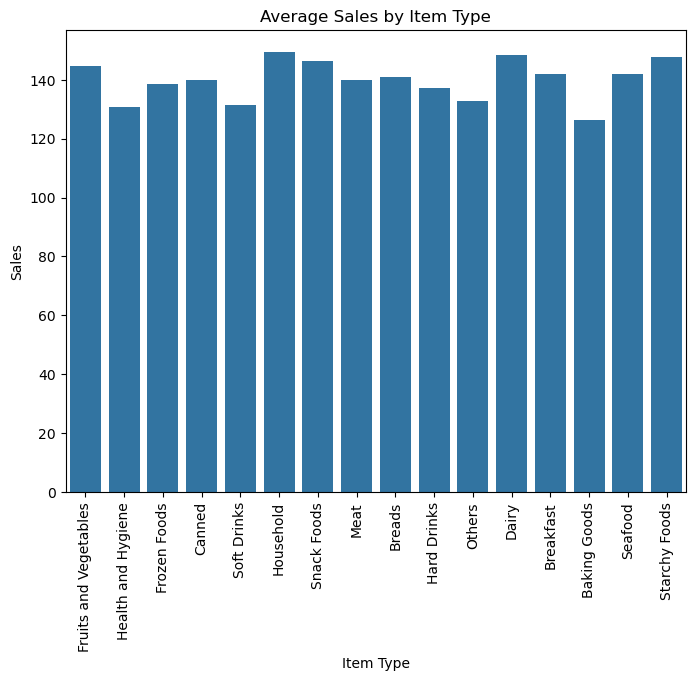

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(x="Item Type", y="Sales", data=df, estimator=np.mean, ci=None)
plt.xticks(rotation=90)
plt.title("Average Sales by Item Type")
plt.show()

## Sales by Outlet Type

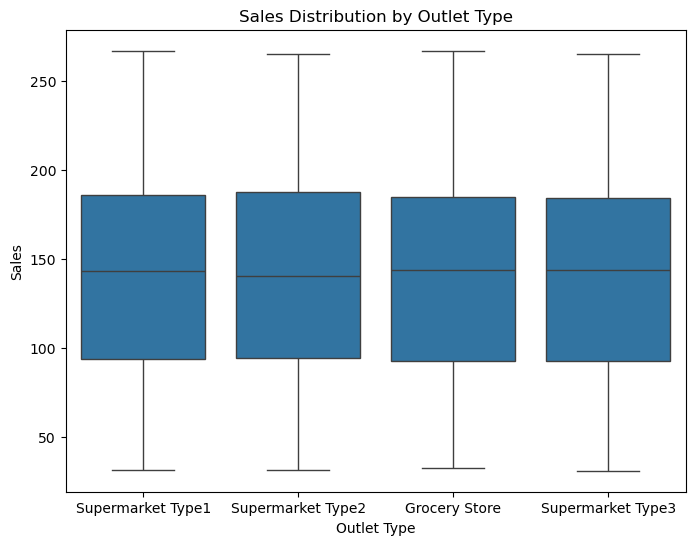

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Outlet Type", y="Sales", data=df)
plt.title("Sales Distribution by Outlet Type")
plt.show()

## Sales by Fat Content

C:\Users\Dell\AppData\Local\Temp\ipykernel_14072\65361688.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Item Fat Content", y="Sales", data=df, estimator=np.mean, ci=None)


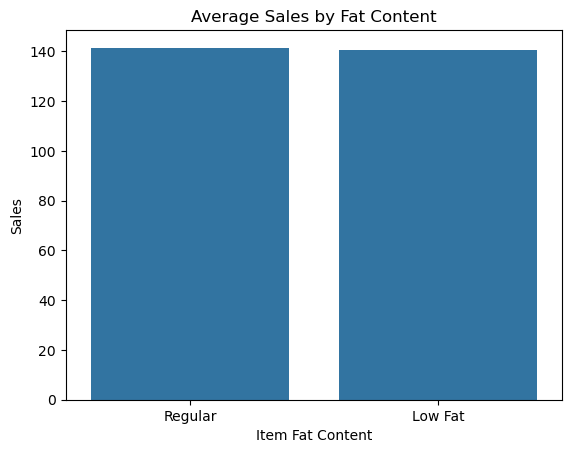

In [17]:
sns.barplot(x="Item Fat Content", y="Sales", data=df, estimator=np.mean, ci=None)
plt.title("Average Sales by Fat Content")
plt.show()

## Sales vs Item Visibility

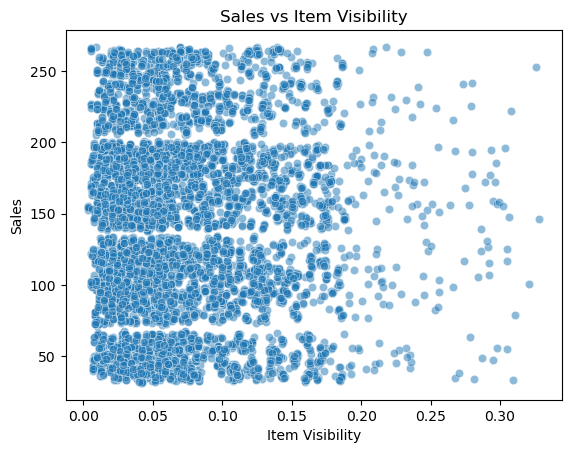

In [18]:
sns.scatterplot(x="Item Visibility", y="Sales", data=df, alpha=0.5)
plt.title("Sales vs Item Visibility")
plt.show()

## Revenue by Location Type

C:\Users\Dell\AppData\Local\Temp\ipykernel_14072\1987513344.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Outlet Location Type", y="Sales", data=df, estimator=np.sum, ci=None)


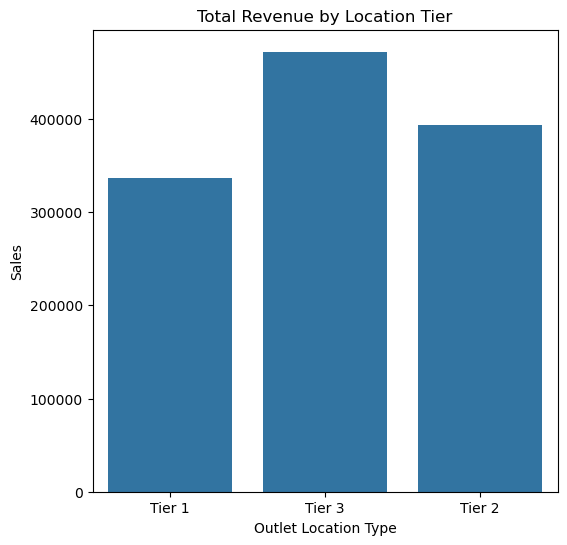

In [19]:
plt.figure(figsize=(6,6))
sns.barplot(x="Outlet Location Type", y="Sales", data=df, estimator=np.sum, ci=None)
plt.title("Total Revenue by Location Tier")
plt.show()

## Sales per Weight (Value Density)

In [20]:
df["Sales per Weight"] = df["Sales"] / df["Item Weight"]
top_density = df.groupby("Item Identifier")["Sales per Weight"].mean().nlargest(10)
print("Top 10 Items by Sales per Weight:\n", top_density)

Top 10 Items by Sales per Weight:
 Item Identifier
NCW30    49.663378
FDL58    45.667266
FDS56    45.394734
FDX49    44.124858
NCF06    41.587201
FDX35    40.515138
FDK28    40.234878
DRM11    39.684597
FDT07    38.596070
FDS13    38.280450
Name: Sales per Weight, dtype: float64


## Store Age vs Sales

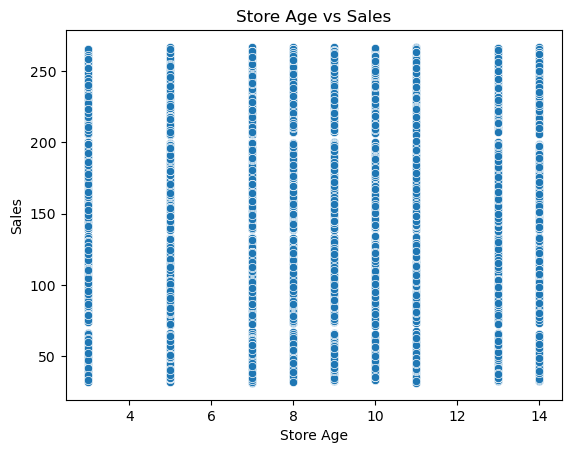

In [21]:
sns.scatterplot(x="Store Age", y="Sales", data=df)
plt.title("Store Age vs Sales")
plt.show()

## Outlet Size vs Sales

C:\Users\Dell\AppData\Local\Temp\ipykernel_14072\1853962483.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Outlet Size", y="Sales", data=df, estimator=np.mean, ci=None)


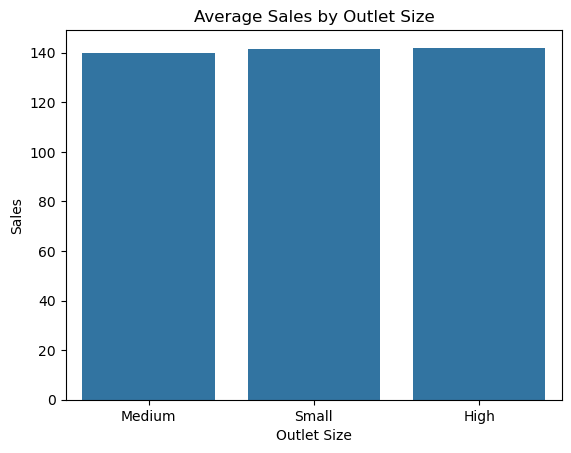

In [22]:
sns.barplot(x="Outlet Size", y="Sales", data=df, estimator=np.mean, ci=None)
plt.title("Average Sales by Outlet Size")
plt.show()

## Ratings impact

In [23]:
corr = df[["Sales", "Rating"]].corr()
print("Correlation between Sales and Rating:\n", corr)

Correlation between Sales and Rating:
            Sales    Rating
Sales   1.000000  0.011329
Rating  0.011329  1.000000
